<a href="https://colab.research.google.com/github/samikshakak/ML_ASSIGNMENT/blob/main/ml3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64
Best R² score: 0.9243869413350316
Best β matrix: [1.23161736e+06 2.30225051e+05 1.63956839e+05 1.21115120e+05
 7.83467170e+02 1.50662447e+05]


NameError: name 'plt' is not defined

Best R² score: 0.9243869413350316
Best β matrix: [1.23161736e+06 2.30225051e+05 1.63956839e+05 1.21115120e+05
 7.83467170e+02 1.50662447e+05]


Missing values in each column:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64
Best R² score: 0.9243869413350316
Best β matrix: [1.23161736e+06 2.30225051e+05 1.63956839e+05 1.21115120e+05
 7.83467170e+02 1.50662447e+05]


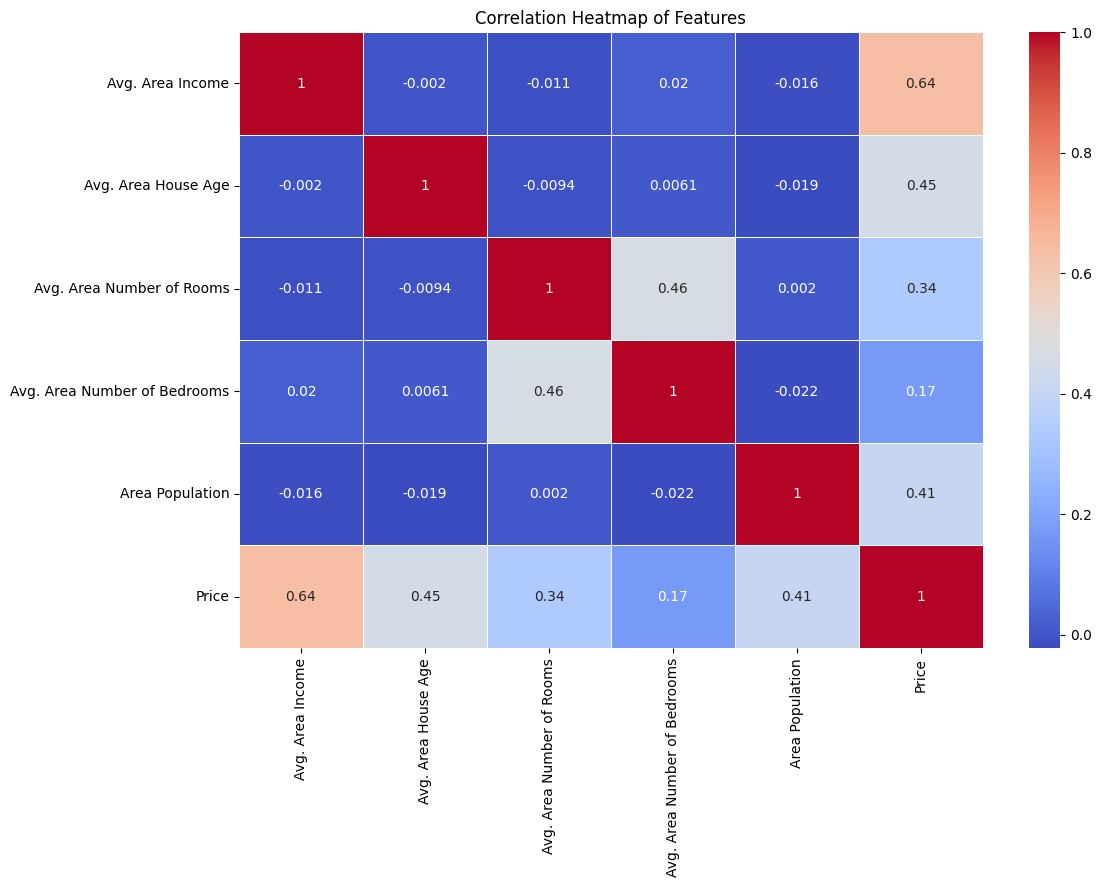

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# Step 1: Load the dataset
url = "/content/USA_Housing.csv"  # Update this path as needed
data = pd.read_csv(url)

# Step 2: Handle Missing Values
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Impute missing values if necessary (assuming mean imputation for simplicity)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 3: Encode Categorical Variables
categorical_cols = data_imputed.select_dtypes(include=['object']).columns
numerical_cols = data_imputed.select_dtypes(include=['int64', 'float64']).columns

# Apply OneHotEncoding to categorical columns if any
encoder = OneHotEncoder(sparse=False, drop='first')
if len(categorical_cols) > 0:
    encoded_categorical_data = pd.DataFrame(encoder.fit_transform(data_imputed[categorical_cols]))
    data_encoded = pd.concat([data_imputed[numerical_cols], encoded_categorical_data], axis=1)
else:
    data_encoded = data_imputed.copy()

# Step 4: Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(data_encoded.drop('Price', axis=1))  # Scaled input features
y = data_encoded['Price'].values  # Output variable (Price)

# Step 5: K-Fold Cross Validation for Multiple Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_r2 = -np.inf
best_beta = None

# Run five iterations of cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Calculate the beta (𝛽) matrix using the least squares method
    X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]  # Add a column of ones for intercept
    beta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

    # Make predictions on the test set
    X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]
    y_pred = X_test_b.dot(beta)

    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)

    # Update the best beta matrix if the current R² score is better
    if r2 > best_r2:
        best_r2 = r2
        best_beta = beta

# Output the best R² score and corresponding beta matrix
print(f"Best R² score: {best_r2}")
print("Best β matrix:", best_beta)

# Step 6: Create a Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
